# scratch work

In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.time import Time

from jorbit.mpchecker import mpchecker, nearest_asteroid


In [2]:
mpchecker(
    coordinate=SkyCoord(ra=0*u.deg, dec=0*u.deg),
    time=Time("2025-02-01"),
    radius=5*u.arcmin,
)

name,separation,ra,dec
,arcsec,deg,deg
str7,float64,float64,float64
270258,104.1808207360553,359.97292932446953,-0.01022990808315794
51910,143.31642575663903,0.018295392777435124,-0.035357094930712325
137143,246.1114123633815,359.93371498406174,-0.01673235585937548
254903,270.33085614398374,359.9886589111433,-0.07423054556318036
739168,274.188362870427,359.96852902476695,-0.06935738533299034


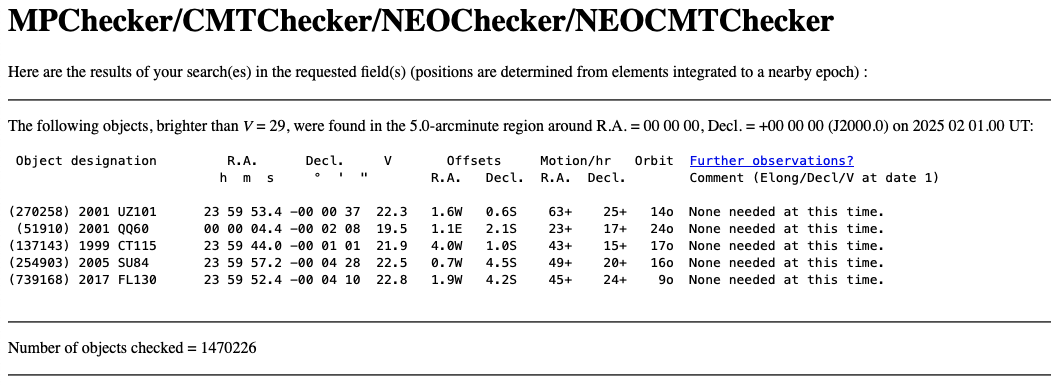

In [3]:
dists = nearest_asteroid(
    coordinate=SkyCoord(ra=0*u.deg, dec=0*u.deg),
    times=Time("2025-02-01") + np.arange(0, 3, 1/24/4)*u.day,
)

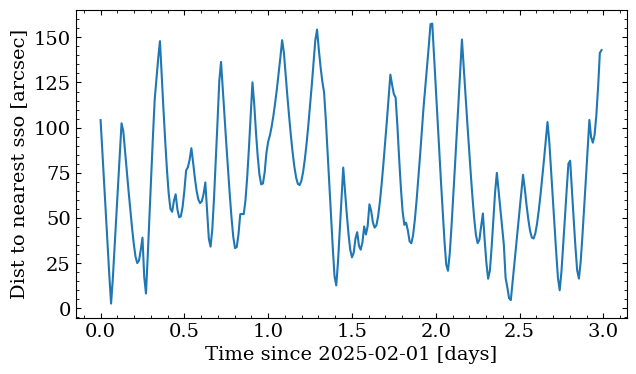

In [7]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, 3, 1/24/4), dists)
ax.set(xlabel="Time since 2025-02-01 [days]", ylabel="Dist to nearest sso [arcsec]");

In [1]:
import jax

jax.config.update("jax_enable_x64", True)

import astropy.units as u
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astroquery.jplhorizons import Horizons

from jorbit import Observations, Particle

In [2]:
nights = [Time("2025-01-01 07:00"), Time("2025-01-02 07:00"), Time("2025-01-05 07:00")]

times = []
for n in nights:
    times.extend([n + i * 1 * u.hour for i in range(3)])
times = Time(times)


obj = Horizons(id="274301", location="695@399", epochs=times.utc.jd)
# obj = Horizons(id="90377", location="695@399", epochs=times.utc.jd)
pts = obj.ephemerides(extra_precision=True, quantities="1")

coords = SkyCoord(pts["RA"], pts["DEC"], unit=(u.deg, u.deg))
times = Time(pts["datetime_jd"], format="jd", scale="utc")


obs = Observations(
    observed_coordinates=coords,
    times=times,
    observatories="kitt peak",
    astrometric_uncertainties=1 * u.arcsec,
)


obj = Horizons(id="274301", location="500@0", epochs=times.tdb.jd[0])
# obj = Horizons(id="90377", location="500@0", epochs=times.tdb.jd[0])
vecs = obj.vectors(refplane="earth")
true_x0 = jnp.array([vecs["x"], vecs["y"], vecs["z"]]).T[0]
true_v0 = jnp.array([vecs["vx"], vecs["vy"], vecs["vz"]]).T[0]


p0 = Particle(
    x=true_x0, v=true_v0, time=times[0], name="274301 Wikipedia", observations=obs
)
# p0 = Particle(
#     x=true_x0, v=true_v0, time=times[0], name="90377 Sedna", observations=obs,
# )
p0

Particle: 274301 Wikipedia